This notebook plots the mean spkd distance between two Poisson spike trains 
of a given duration, for a range of firing rates and cost parameters

Either estimates these numerically and saves results to a file, or loads precomputed results from saved file 

In [1]:
# imports
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adds parent directory to path

import numpy as np  
from poisson_utils import generate_poisson_unit # is used in commented-out code
from tbc_computation import randSpkd            # is used in commented-out code
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
 

The following cell is computationally expensive, so we have saved the results to a file and commented out the code; subsequent cells load the file to avoid recomputing this.

In [ ]:
# === PARAMETERS TO SIMULATE ===
# DURATION = 1.0  # Global constant
# N = 500         # Number of repetitions per FR-cost pair
# firing_rates = np.linspace(1, 100, 20)
# cost_values = np.logspace(-3, 6, num=70)

# === OUTPUT STORAGE ===
# spkd_per_spike = np.zeros((len(cost_values), len(firing_rates)))
# spkd_per_sec = np.zeros_like(spkd_per_spike)

# # === SIMULATION LOOP ===
# for i, cost in enumerate(tqdm(cost_values, desc="Costs")):
#     for j, fr in enumerate(firing_rates):
#         # Simulate spike trains
#         spike_trains = generate_poisson_unit(fr, duration=DURATION, N=N)
        
#         # Compute SPKD
#         result = randSpkd(spike_trains, duration=DURATION, cost=cost)
#         mean_dist = result['mean']
        
#         # Store normalized values
#         spkd_per_spike[i, j] = mean_dist / (fr * DURATION)
#         spkd_per_sec[i, j] = mean_dist / DURATION


Costs: 100%|██████████| 70/70 [16:11<00:00, 13.88s/it]


In [ ]:
# # === SAVE NUMERICAL ESTIMATES OF SPKD FOR SIMULATED POISSON  ===
# np.savez('spkd_poisson_equalized.npz',
#          firing_rates=firing_rates,
#          cost_values=cost_values,
#          spkd_per_spike=spkd_per_spike,
#          spkd_per_sec=spkd_per_sec)

In [2]:
# Load the precomputed numerical estimates from file instead of recomputing
spkd_data = np.load('spkd_poisson_equalized.npz', allow_pickle=True)
firing_rates, cost_values, spkd_per_spike, spkd_per_sec = (spkd_data['firing_rates'],
                                                          spkd_data['cost_values'],
                                                          spkd_data['spkd_per_spike'],
                                                          spkd_data['spkd_per_sec'])

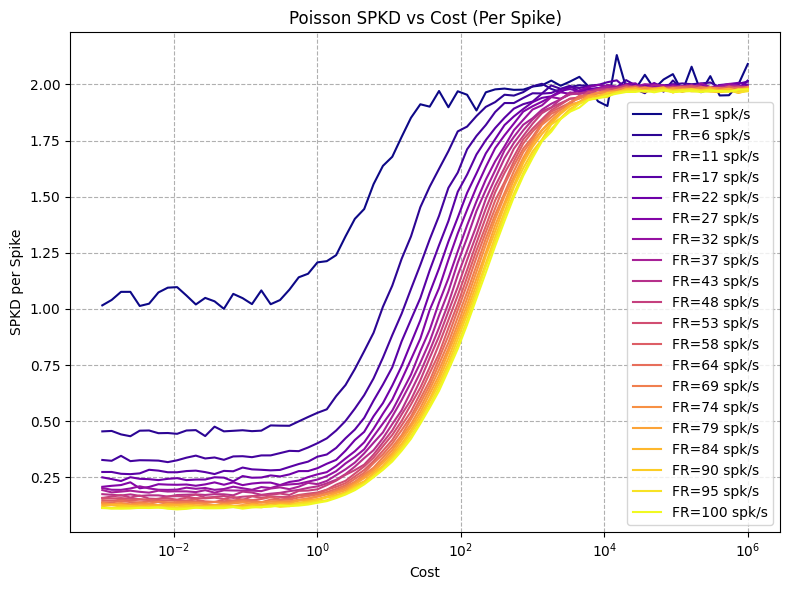

In [3]:
# === PLOT: SPKD per spike vs Cost ===
plt.figure(figsize=(8, 6))

norm = Normalize(vmin=0, vmax=len(firing_rates) - 1)

plasma = plt.get_cmap('plasma')

for j, fr in enumerate(firing_rates):
    color = plasma(norm(j))
    plt.plot(cost_values, spkd_per_spike[:, j], label=f'FR={fr:.0f} spk/s', color=color)

plt.xscale('log')
plt.xlabel('Cost')
plt.ylabel('SPKD per Spike')
plt.title('Poisson SPKD vs Cost (Per Spike)')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig('spkd_poisson_per_spike.png')
plt.show()
